<a href="https://colab.research.google.com/github/Karlajack/pydata_analysis/blob/main/Pydatacapstoneproject_Worldhappiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import mapclassify as mc
import plotly.express as px

In [1]:
pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 61.4 MB/s eta 0:00:00


In [60]:
df2019=pd.read_csv('/content/World Happiness Report 2019.csv')
df2020=pd.read_csv('/content/World Happiness Report 2020.csv')
df2021=pd.read_csv('/content/World Happiness Report 2021.csv')
df2022=pd.read_csv('/content/World Happiness Report 2022.csv')
df2023=pd.read_csv('/content/World Happiness Report 2023.csv')
df2021.head()


,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Year
0,Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481,3.253,2021
1,Denmark,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2.868,2021
2,Switzerland,7.571,1.566,1.079,0.816,0.653,0.204,0.413,2.839,2021
3,Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2.967,2021
4,Netherlands,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2.798,2021


In [110]:
df = pd.concat([df2019,df2020,df2021,df2022,df2023])
df.head()



,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Year
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714,2019
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394,2019
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.241,2019
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.401,2019
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.394,2019


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 741 entries, 0 to 136
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       741 non-null    object 
 1   Happiness Score               741 non-null    float64
 2   GDP per capita                741 non-null    float64
 3   Social support                740 non-null    float64
 4   Healthy life expectancy       740 non-null    float64
 5   Freedom to make life choices  741 non-null    float64
 6   Generosity                    741 non-null    float64
 7   Perceptions of corruption     741 non-null    float64
 8   Dystopia + residual           740 non-null    float64
 9   Year                          741 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 63.7+ KB


In [112]:
df.head()

,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Year
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2.714,2019
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2.394,2019
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.241,2019
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2.401,2019
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2.394,2019


In [115]:
df['Year'] = df['Year'].astype(str)

df = df.set_index('Year')





<ipython-input-116-4e30236fd8de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Happiness Score", y = "Country", data=df2023_happiest_unhappiest, palette = "coolwarm")


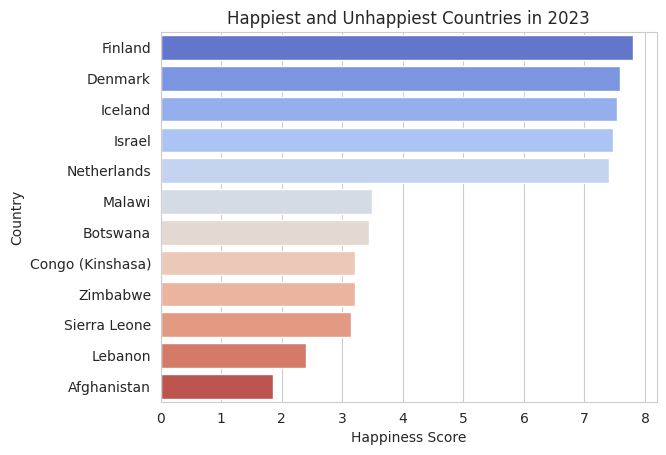

In [116]:
df2023_happiest_unhappiest = df2023[(df2023.loc[:, "Happiness Score"] > 7.4) | (df2023.loc[:, "Happiness Score"] < 3.5)]
sns.barplot(x = "Happiness Score", y = "Country", data=df2023_happiest_unhappiest, palette = "coolwarm")
plt.title("Happiest and Unhappiest Countries in 2023")
plt.show()




In [117]:
df2023_g=df2023.sort_values(by='Generosity',ascending=False)


df2023_g=pd.concat([df2023_g.head(5),df2023_g.tail(5)])
df2023_g


,Country,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Year
83,Indonesia,5.277,1.384,1.169,0.314,0.663,0.422,0.038,1.288,2023
116,Myanmar,4.372,1.032,1.125,0.269,0.460,0.400,0.194,0.893,2023
118,Gambia,4.279,0.761,0.614,0.174,0.286,0.332,0.033,2.081,2023
110,Kenya,4.487,1.051,0.881,0.190,0.418,0.291,0.055,1.601,2023
59,Thailand,5.843,1.515,1.344,0.461,0.624,0.291,0.013,1.594,2023
131,Botswana,3.435,1.471,1.041,0.087,0.480,0.021,0.071,0.264,2023
99,Morocco,4.903,1.236,0.535,0.337,0.540,0.013,0.085,2.158,2023
46,Japan,6.129,1.825,1.396,0.622,0.556,0.009,0.207,1.513,2023
57,Greece,5.931,1.708,1.247,0.535,0.248,0.008,0.097,2.089,2023
89,Georgia,5.109,1.477,0.947,0.366,0.539,0.000,0.201,1.580,2023


<ipython-input-67-c73daa665609>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Generosity", y = "Country", data = df2023_g, palette = "coolwarm")


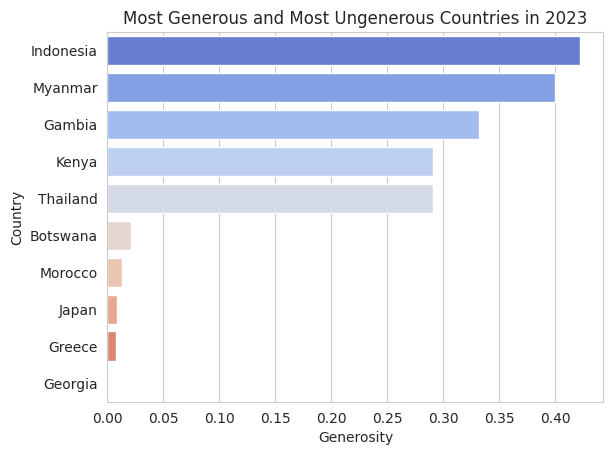

In [67]:
sns.barplot(x = "Generosity", y = "Country", data = df2023_g, palette = "coolwarm")
plt.title("Most Generous and Most Ungenerous Countries in 2023")
plt.show()

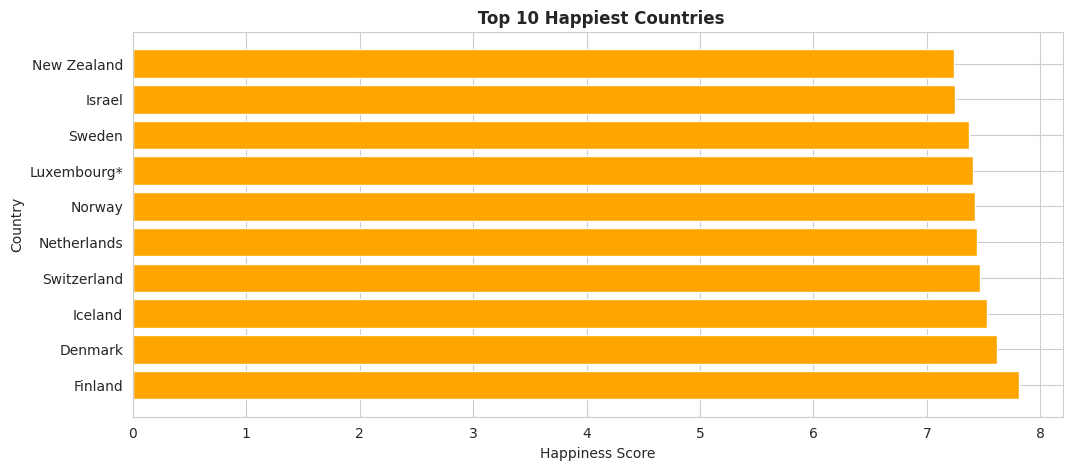

In [118]:
df_h= df.groupby('Country')[['Happiness Score']].mean().sort_values(by='Happiness Score',ascending=False).head(10).reset_index()
plt.figure(figsize=(12,5))
Country=df_h['Country']
values=df_h['Happiness Score']
plt.barh(Country, values,color='Orange')
plt.title(" Top 10 Happiest Countries",fontsize=12,fontweight='bold')
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

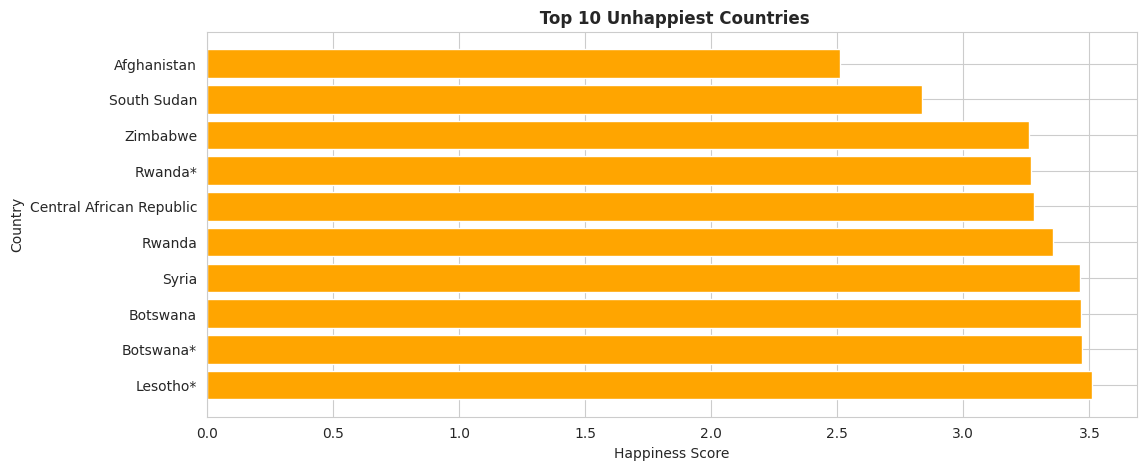

In [119]:
df_h= df.groupby('Country')[['Happiness Score']].mean().sort_values(by='Happiness Score',ascending=False).tail(10).reset_index()
plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
Country=df_h['Country']
values=df_h['Happiness Score']
plt.barh(Country, values,color='Orange')
plt.title(" Top 10 Unhappiest Countries",fontsize=12,fontweight='bold')
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.show()

In [126]:
df_hy.sort_values(by='Year',ascending=True)

,Year,Happiness Score
4,2019,5.407096
3,2020,5.473240
2,2021,5.532839
1,2022,5.553575
0,2023,5.539796


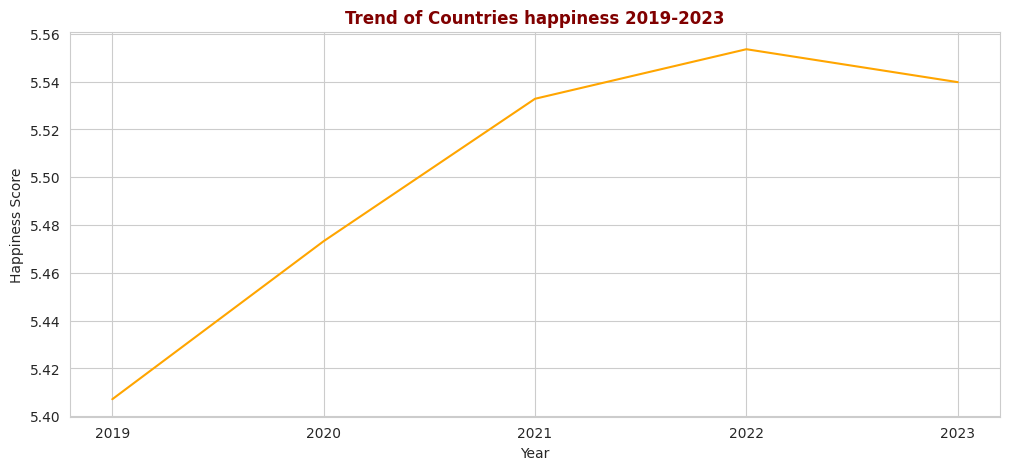

In [135]:

df_hy= df.groupby('Year')[['Happiness Score']].mean().sort_values(by='Year',ascending=True).reset_index()
df_hy
plt.figure(figsize=(12,5))
x=df_hy['Year']
y=df_hy['Happiness Score']
plt.plot(x,y,color='Orange')
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.title("Trend of Countries happiness 2019-2023",fontsize=12,fontweight='bold',color='Maroon')
plt.show()






In [140]:
df_hc= df.groupby('Country')[['Happiness Score']].mean().sort_values(by='Happiness Score',ascending=False).head().reset_index()
df_hc




,Country,Happiness Score
0,Finland,7.80894
1,Denmark,7.61752
2,Iceland,7.52790
3,Switzerland,7.47258
4,Netherlands,7.44378
